<a href="https://colab.research.google.com/github/Shubhangiwaghmare7/Data-Science/blob/main/deeplearningLRclass1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# !pip install tensorflow

In [4]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import warnings
from sklearn.model_selection import train_test_split
%matplotlib inline
warnings.filterwarnings('ignore')

In [5]:
url='https://raw.githubusercontent.com/Afsaan/Linear-Regression-with-TensorFlow-2.x/master/graduate_admission.csv'

In [6]:
df=pd.read_csv(url)
df

,index,gre,toefl,uni_rating,sop,lor,cgpa,research,admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [5]:
#data preprocessing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       400 non-null    int64  
 1   gre         400 non-null    int64  
 2   toefl       400 non-null    int64  
 3   uni_rating  400 non-null    int64  
 4   sop         400 non-null    float64
 5   lor         400 non-null    float64
 6   cgpa        400 non-null    float64
 7   research    400 non-null    int64  
 8   admit       400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [6]:
df.isnull().sum()

index         0
gre           0
toefl         0
uni_rating    0
sop           0
lor           0
cgpa          0
research      0
admit         0
dtype: int64

In [7]:
#target='admit'
x=df.iloc[:,1:8]
y=df['admit']

In [8]:
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=101,test_size=0.2)

In [9]:
#creating a model
model=Sequential([
                  Dense(32,activation='relu',kernel_initializer='he_normal'),
                  Dense(16,activation='sigmoid'),
                  Dense(8,activation='relu',kernel_initializer='he_normal'),
                  Dense(4,activation='sigmoid'),
                  Dense(2,activation='relu',kernel_initializer='he_normal'),
                  Dense(1),
])

In [10]:
model.compile(optimizer='SGD',loss=tensorflow.keras.losses.mae,metrics=['mae'])

In [11]:
history=model.fit(x,y,epochs=50,batch_size=32,validation_split=0.2)

Epoch 1/50
10/10 [==============================] - 1s 50ms/step - loss: 0.7549 - mae: 0.7549 - val_loss: 0.6041 - val_mae: 0.6041
Epoch 2/50
10/10 [==============================] - 0s 6ms/step - loss: 0.6079 - mae: 0.6079 - val_loss: 0.5041 - val_mae: 0.5041
Epoch 3/50
10/10 [==============================] - 0s 5ms/step - loss: 0.5022 - mae: 0.5022 - val_loss: 0.4041 - val_mae: 0.4041
Epoch 4/50
10/10 [==============================] - 0s 5ms/step - loss: 0.4006 - mae: 0.4006 - val_loss: 0.3063 - val_mae: 0.3063
Epoch 5/50
10/10 [==============================] - 0s 5ms/step - loss: 0.2944 - mae: 0.2944 - val_loss: 0.2249 - val_mae: 0.2249
Epoch 6/50
10/10 [==============================] - 0s 7ms/step - loss: 0.2327 - mae: 0.2327 - val_loss: 0.1705 - val_mae: 0.1705
Epoch 7/50
10/10 [==============================] - 0s 5ms/step - loss: 0.1603 - mae: 0.1603 - val_loss: 0.1374 - val_mae: 0.1374
Epoch 8/50
10/10 [==============================] - 0s 5ms/step - loss: 0.1349 - mae: 0.1

In [12]:
history

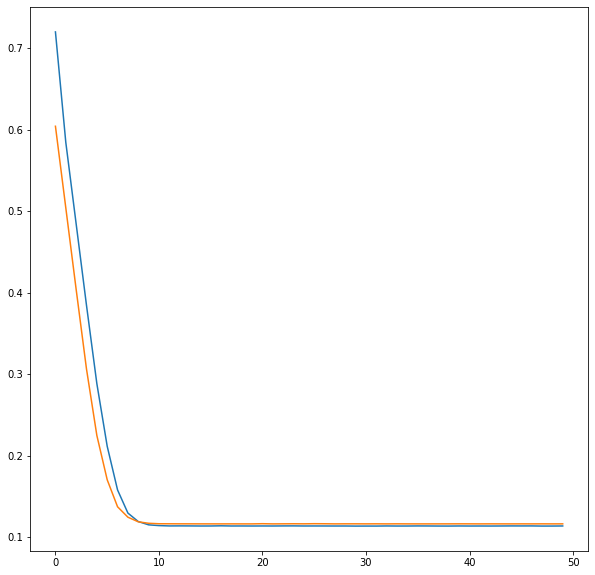

In [13]:
mae=history.history['mae']
valmae=history.history['val_mae']

epochs=range(len(mae))
plt.figure(figsize=(10,10))
plt.plot(epochs,mae,valmae, label=['Training MAE'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 3         
Total params: 969
Trainable params: 969
Non-trainable params: 0
__________________________________________________________